# Constants

In [8]:
ROOT_DIR_TST = "./RWF-2000/cached/test"
LABEL_MAP = {'Fight': 1, 'NonFight': 0}
BATCH_SIZE = 4
NUM_WORKERS = 4
MODEL_NAME = "best_rec"
THRESHOLD = 0.5

# Packages

In [9]:
# !pip install fvcore
# !pip install torchmetrics
# !pip install opencv-python

In [10]:
from torch.utils.data import DataLoader
from utils.video_dataset import VideoDataset
import fight_detection
import utils

# Data Preparation

In [11]:
tst_dataset = VideoDataset(
    root_dir=ROOT_DIR_TST, 
    label_map=LABEL_MAP,
)

tst_loader = DataLoader(
    dataset=tst_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, 
    num_workers=NUM_WORKERS,
)

# Load Model

In [12]:
PATH = f'./checkpoint/{MODEL_NAME}.pth'

kwargs = dict(
    ModelClass=fight_detection.model.FightDetection,
    path=PATH,
)

model = utils.checkpoint.load(**kwargs)

Using cache found in /home/work/.cache/torch/hub/facebookresearch_pytorchvideo_main


# Prediction

In [13]:
kwargs = dict(
    model=model,
    threshold=THRESHOLD,
)

loop = fight_detection.loop.PredictionLoop(**kwargs)

PREDICTION: 100%|██████████| 52/52 [00:11<00:00,  4.58it/s]


ACC:	0.9134615659713745
PRE:	0.9300000071525574
REC:	0.8942307829856873
F1:	0.9117646813392639


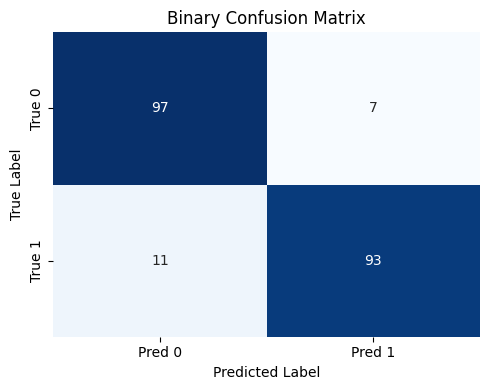

In [14]:
loop.predict(tst_loader)